# Class 16 - Clustering

## The Basics

In [340]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn

In [341]:
a = sn.load_dataset('iris')

In [ ]:
a.head()

In [ ]:
sn.pairplot(a, hue='species', size=2)

In [ ]:
import sklearn as sk

In [342]:
X = a.drop(['petal_length','sepal_width','species'], axis=1)

In [343]:
import sklearn.preprocessing as pp
le = pp.LabelEncoder()
y = le.fit_transform(a['species'].astype(str))

In [ ]:
np.unique(y)
a['species'].unique()

In [344]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

In [345]:
silhouette_score(X, y_kmeans)

0.5052738291206261

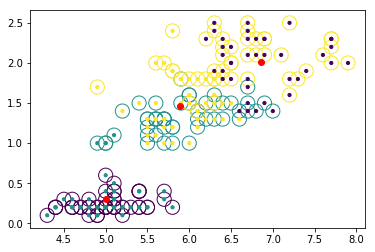

In [346]:
orig = plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, s=200)
orig.set_facecolor('None') # Set color to None
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=10, c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='red' );

## Dimension Reduction

In [347]:
from sklearn.manifold import Isomap

In [348]:
iso = Isomap(n_components=2)
iris_reduced = iso.fit_transform(a.drop('species', axis=1))

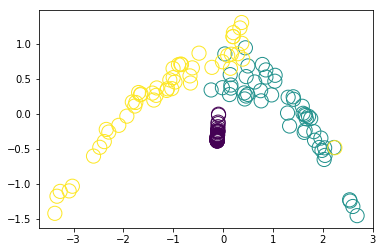

In [349]:
orig_reduced = plt.scatter(iris_reduced[:,0], iris_reduced[:, 1], c=y, s=200)
orig_reduced.set_facecolor('None') # Set color to None

## A Pipeline

In [358]:
from sklearn.pipeline import Pipeline

In [ ]:
X_complete = a.drop(['species'], axis=1)

In [ ]:
pipe = Pipeline([('scale', pp.StandardScaler()),('cluster', KMeans())])

In [359]:
pipe = Pipeline([('cluster', KMeans())])

In [360]:
cluster__n_clusters = [2,3,4]

In [361]:
from sklearn.metrics import silhouette_score

In [363]:
score = pd.DataFrame(columns=['clusters', 'silhouette_score', 'labels'])
for n_cluster in cluster__n_clusters:
    pipe = pipe.set_params(cluster__n_clusters = n_cluster)
    #pipe = pipe_no_iso.set_params(cluster__n_clusters =n_cluster)
    #pipe = KMeans(n_clusters=n_cluster)
    labels = pipe.fit_predict(X_complete)
    silhouette_avg = silhouette_score(X, labels)
    score = score.append({'clusters':n_cluster, 'silhouette_score': silhouette_avg, 'labels': labels}, ignore_index=True)

In [364]:
score.sort_values(by='silhouette_score')

,clusters,silhouette_score,labels
2,4,0.440133,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,3,0.473692,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
0,2,0.575650,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


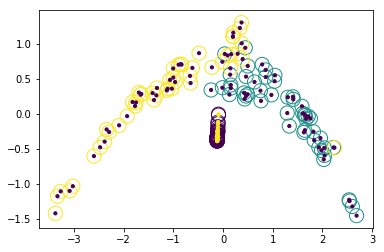

In [354]:
orig_reduced = plt.scatter(iris_reduced[:,0], iris_reduced[:, 1], c=y, s=200)
orig_reduced.set_facecolor('None') # Set color to None
plt.scatter(iris_reduced[:,0], iris_reduced[:,1], s=10, c=score.iloc[0,2])

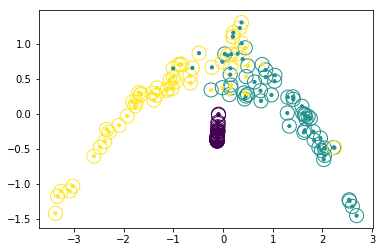

In [355]:
orig_reduced = plt.scatter(iris_reduced[:,0], iris_reduced[:, 1], c=y, s=200)
orig_reduced.set_facecolor('None') # Set color to None
plt.scatter(iris_reduced[:,0], iris_reduced[:,1], s=10, c=score.iloc[1,2])

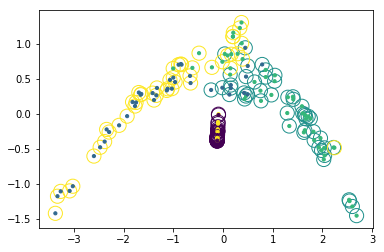

In [356]:
orig_reduced = plt.scatter(iris_reduced[:,0], iris_reduced[:, 1], c=y, s=200)
orig_reduced.set_facecolor('None') # Set color to None
plt.scatter(iris_reduced[:,0], iris_reduced[:,1], s=10, c=score.iloc[2,2])

## Other Clustering Algorithms

In [327]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering

In [328]:
cluster = 3
algos = [AgglomerativeClustering(n_clusters=cluster), Birch(n_clusters=3), SpectralClustering(n_clusters=3)]

In [335]:
score_algo = pd.DataFrame(columns=['silhouette_score', 'labels'])
for algo in algos:
    labels = algo.fit_predict(X_complete)
    silhouette_avg = silhouette_score(X_complete, labels)
    score_algo = score_algo.append({'silhouette_score': silhouette_avg, 'labels': labels}, ignore_index=True)

In [336]:
score_algo

,silhouette_score,labels
0,0.554324,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,0.501952,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
2,0.551157,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
